In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

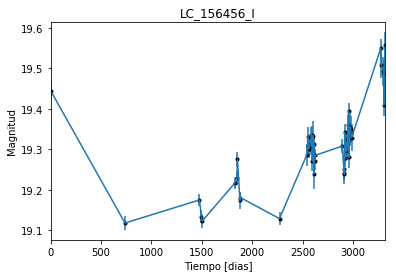

In [5]:
data = np.genfromtxt('LC_156456_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_156456_I')
plt.savefig("LC_156456_I.pdf")

In [6]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [7]:
%%capture capt
sample = model.run_mcmc(20000)

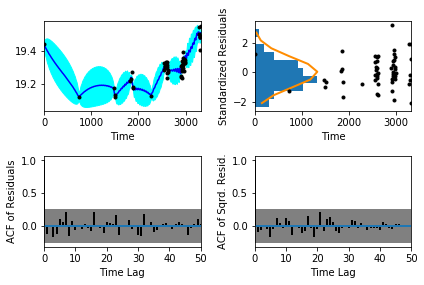

In [9]:
sample.assess_fit()

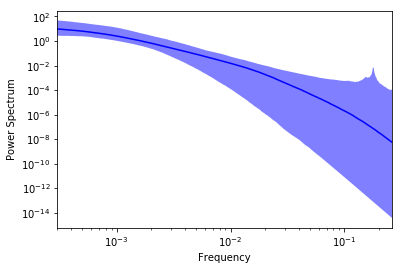

In [10]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [11]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

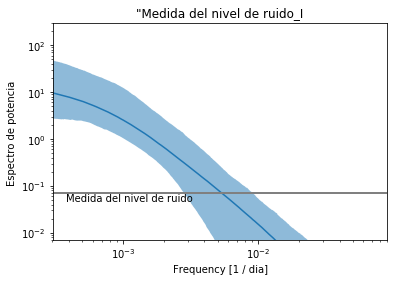

In [12]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_156456_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_156456_I')

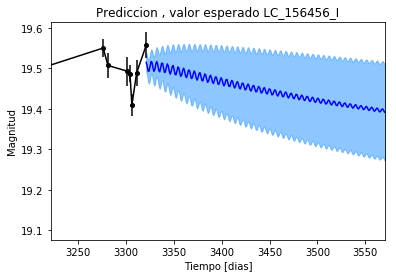

In [13]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_156456_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_156456_I')

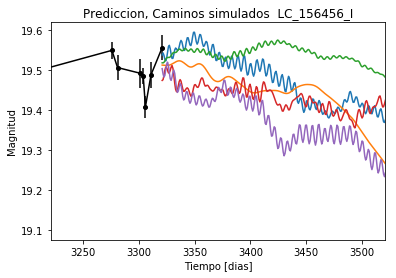

In [14]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_156456_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


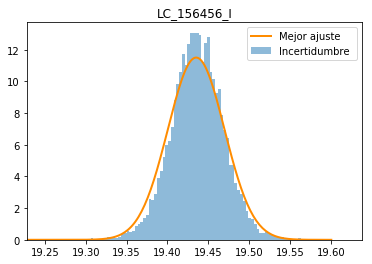

In [15]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_156456_I')
plt.savefig("Mejor_ajuste_LC_156456_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_156456_I')

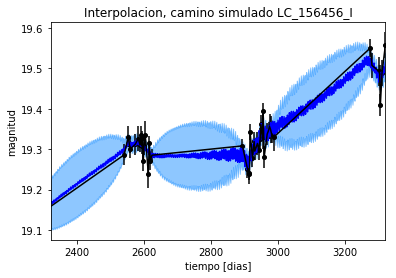

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_I')

Text(0.5,1,'Interpolacion, camino simulado LC_156456_I')

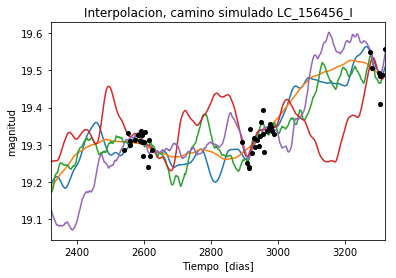

In [17]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_I')

In [18]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [19]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 592.508823937
Median: 0.0134881309743
Standard deviation: 0.10945261619
68% credibility interval: [ 0.00107762  0.13706515]
95% credibility interval: [  3.81129697e-04   4.16513790e-01]
99% credibility interval: [  3.16125791e-04   5.00399535e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 737.497877656
Median: 0.00393811361969
Standard deviation: 0.0518686887675
68% credibility interval: [ 0.00053162  0.03627606]
95% credibility interval: [ 0.00032198  0.17751279]
99% credibility interval: [  3.04963118e-04   3.65312515e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 460.592180515
Median: 0.0329306986466
Standard d

In [20]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 401.095878361
Median: 115.311502957
Standard deviation: 2.15309424862
68% credibility interval: [ 113.25050842  116.94013745]
95% credibility interval: [ 110.55730179  119.95832087]
99% credibility interval: [ 108.53217986  121.54926857]


In [21]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 278.575177074
Median: 0.663434884988
Standard deviation: 1.26394455586
68% credibility interval: [ 0.0949571   2.55774374]
95% credibility interval: [ 0.01933384  4.18047376]
99% credibility interval: [ 0.01226666  5.59711481]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 870.20648765
Median: 0.847419791925
Standard deviation: 2.52305249089
68% credibility interval: [ 0.05055929  3.6589048 ]
95% credibility interval: [  2.93473690e-03

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 8302.17655617
Median: 9.31754560071e-53
Standard deviation: 1.81944724814e+55
68% credibility interval: [  1.12245307e-126   4.27854892e-013]
95% credibility interval: [  2.74580238e-192   4.26398054e+000]
99% credibility interval: [  9.55024565e-230   1.01161920e+041]


In [23]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1208.01995991
Median: 19.2802563383
Standard deviation: 0.0753541424144
68% credibility interval: [ 19.21884418  19.35044603]
95% credibility interval: [ 19.14599995  19.43753495]
99% credibility interval: [ 19.07449656  19.52082329]


In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 228.041602255
Median: 0.0588568729551
Standard deviation: 0.132855441224
68% credibility interval: [ 0.          0.24417781]
95% credibility interval: [ 0.         0.4554761]
99% credibility interval: [ 0.          0.50743183]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 228.041602255
Median: 0.0588568729551
Standard deviation: 0.132855441224
68% credibility interval: [ 0.          0.24417781]
95% credibility interval: [ 0.         0.4554761]
99% credibility interval: [ 0.          0.50743183]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1235.49163598
Median: 0.0
Standard deviation: 0.000321663287138
68% credib

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 401.095878361
Median: 115.311502957
Standard deviation: 2.15309424862
68% credibility interval: [ 113.25050842  116.94013745]
95% credibility interval: [ 110.55730179  119.95832087]
99% credibility interval: [ 108.53217986  121.54926857]


In [26]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1099.64042514
Median: 0.0206013968071
Standard deviation: 0.0242313875669
68% credibility interval: [ 0.01269535  0.0365331 ]
95% credibility interval: [ 0.00885726  0.08346356]
99% credibility interval: [ 0.00697341  0.14825908]


In [27]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 611.434661725
Median: 1.2778306553
Standard deviation: 0.237696724204
68% credibility interval: [ 1.05874978  1.52913562]
95% credibility interval: [ 0.86339212  1.81448287]
99% credibility interval: [ 0.76201379  1.94265075]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 522.607782896
Median: 0.000543578806718
Standard deviation: 0.0204571019832
68% credibility interval: [  1.44853285e-05   8.19164794e-03]
95% credibility interval: [  9.71812595e-08   6.15473157e-02]
99% credibility interval: [  1.62694480e-45   1.37582503e-01]


In [29]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 592.508823937
Median: (-0.0847484263589-1.11374291198j)
Standard deviation: 1.08155583326
68% credibility interval: [-0.86120576-0.98375223j -0.00677089-0.99448293j]
95% credibility interval: [ -2.61703333e+00+0.j          -2.39470851e-03-1.13560663j]
99% credibility interval: [ -3.14410300e+00+0.j          -1.98627693e-03-0.05605444j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 737.497877656
Median: (-0.0247438976332+3.04766747274j)
Standard deviation: 0.89611812555
68% credibility interval: [-0.22792922+2.18061317j -0.00334025+0.66452338j]
95% credibility interval: [-1.11534573+1.77135098j -0.00202307+2.73789332j]
99% credibility interval: [ -2.29532623e+00+1.39465705j  -1.91613978e-03+0.91799801j]
Posterior summ